In [64]:
myfile='C:/Users/KVHB6535/Desktop/DS/Python/Data/winequality-white.csv'

import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

wine=pd.read_csv(myfile,sep=";")

In [65]:
wine=wine[["sulphates","alcohol"]]

In [66]:
wine.head()

,sulphates,alcohol
0,0.45,8.8
1,0.49,9.5
2,0.44,10.1
3,0.40,9.9
4,0.40,9.9


In [67]:
wine.describe()

,sulphates,alcohol
count,4898.000000,4898.000000
mean,0.489847,10.514267
std,0.114126,1.230621
min,0.220000,8.000000
25%,0.410000,9.500000
50%,0.470000,10.400000
75%,0.550000,11.400000
max,1.080000,14.200000


In [68]:
wine_std=pd.DataFrame(scale(wine),
                      columns=list(wine.columns))

In [69]:
wine_std.describe()

,sulphates,alcohol
count,4.898000e+03,4.898000e+03
mean,-7.572999e-16,-2.178784e-15
std,1.000102e+00,1.000102e+00
min,-2.364709e+00,-2.043297e+00
25%,-6.997104e-01,-8.242757e-01
50%,-1.739212e-01,-9.286267e-02
75%,5.271310e-01,7.198184e-01
max,5.171602e+00,2.995326e+00


In [70]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]

In [71]:
for k in range_n_clusters:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(wine_std)
    
    print(k,silhouette_score(wine_std,kmeans.labels_))

2 0.3739606160278498
3 0.4108733144046192
4 0.35830133238288514
5 0.3345581603853827
6 0.34926450440359436
7 0.35352118229568075
8 0.3558899936553999
9 0.34853679888863365


In [72]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(wine_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [73]:
labels = kmeans.labels_
wine["cluster"]=labels

In [74]:
wine['cluster'].value_counts()

2    2281
1    1476
0    1141
Name: cluster, dtype: int64

In [75]:
wine.groupby(['cluster']).mean()

,sulphates,alcohol
cluster,,
0,0.646582,10.748785
1,0.418631,11.811721
2,0.457527,9.557394


In [76]:
import seaborn as sns

In [77]:
%matplotlib inline

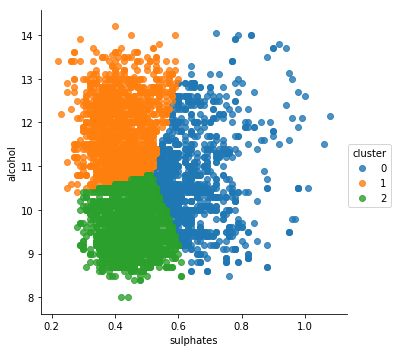

In [78]:
sns.lmplot(fit_reg=False,x='sulphates',y='alcohol',data=wine,hue='cluster')

In [79]:
from sklearn.cluster import AgglomerativeClustering #HOME WORK BELOW THAN THIS TILL DBSCAN

In [80]:
for n_clusters in range(2,10):
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',linkage='ward')
    cluster_labels = cluster_model.fit_predict(wine_std)
    silhouette_avg = silhouette_score(wine_std,cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is:", silhouette_avg)

For n_clusters = 2 The average silhouette_score is: 0.3091095689547383
For n_clusters = 3 The average silhouette_score is: 0.36507065689263013
For n_clusters = 4 The average silhouette_score is: 0.36394118955693916
For n_clusters = 5 The average silhouette_score is: 0.2849369402765109
For n_clusters = 6 The average silhouette_score is: 0.28173689619112985
For n_clusters = 7 The average silhouette_score is: 0.30584775050004287
For n_clusters = 8 The average silhouette_score is: 0.29918403546397854
For n_clusters = 9 The average silhouette_score is: 0.2931385252344828


In [81]:
hclus=AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='ward')

In [82]:
labels_hclus=hclus.fit_predict(wine_std)

In [83]:
wine['cluster_hclus']=labels_hclus

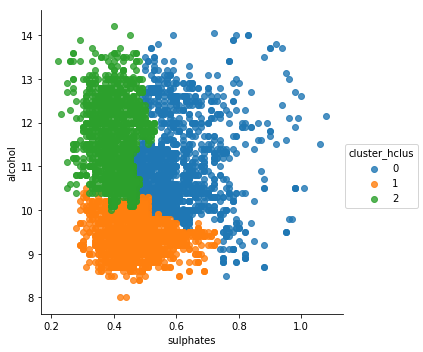

In [84]:
sns.lmplot(fit_reg=False,x='sulphates',y='alcohol',data=wine,hue='cluster_hclus')

In [85]:
wine.head()

,sulphates,alcohol,cluster,cluster_hclus
0,0.45,8.8,2,1
1,0.49,9.5,2,1
2,0.44,10.1,2,1
3,0.40,9.9,2,1
4,0.40,9.9,2,1


# DBSCAN

In [86]:

mydata=pd.read_csv('C:/Users/KVHB6535/Desktop/DS/Python/Data/moon_data.csv').iloc[:,1:]
mydata.head()

,X,Y
0,1.045255,0.332214
1,0.801944,-0.411547
2,-0.749356,0.775108
3,0.975674,0.191768
4,-0.512188,0.929997


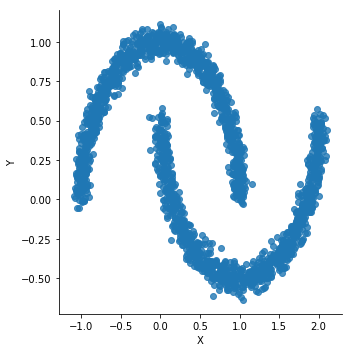

In [87]:
sns.lmplot('X','Y',data=mydata,fit_reg=False) 

In [88]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(mydata)
mydata["cluster"]=kmeans.labels_

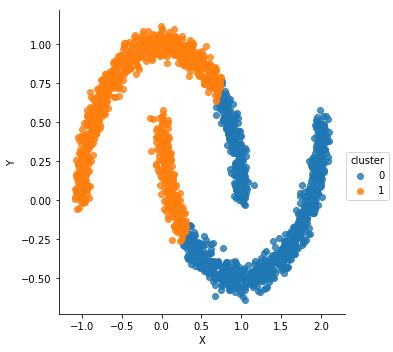

In [89]:
sns.lmplot('X','Y',data=mydata,hue='cluster',fit_reg=False)

In [90]:
from sklearn.cluster import DBSCAN

In [91]:
del mydata['cluster']

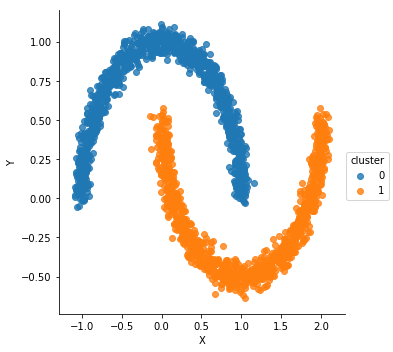

In [112]:
db = DBSCAN(eps=0.2, min_samples=30, metric='euclidean').fit(mydata)
mydata['cluster']=db.labels_
sns.lmplot('X','Y',data=mydata,hue='cluster',fit_reg=False)


In [57]:
pd.Series(db.labels_).value_counts()

1    1000
0    1000
dtype: int64

# anamoly detection with dbscan

In [120]:
myfile='C:/Users/KVHB6535/Desktop/DS/Python/Data/Wholesale customers data.csv'

groc=pd.read_csv(myfile)

groc=groc[["Milk","Grocery"]]

groc_std=pd.DataFrame(scale(groc),columns=list(groc.columns))

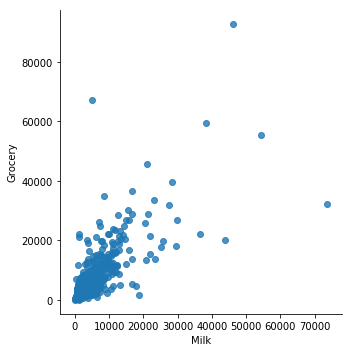

In [116]:
sns.lmplot(x='Milk',y='Grocery',data=groc,fit_reg=False)

In [129]:
r=np.linspace(0.5,5)
for epsilon in r:
    db = DBSCAN(eps=epsilon, min_samples=20, metric='euclidean').fit(groc_std)
    labels = db.labels_
#     n_clust=len(set(labels))-1
    outlier=np.round((labels == -1).sum()/len(labels)*100,2)
#     print('Estimated number of clusters: %d', n_clust)
    print("For epsilon =", epsilon ,", percentage of outliers is: ",outlier)

For epsilon = 0.5 , percentage of outliers is:  9.77
For epsilon = 0.5918367346938775 , percentage of outliers is:  7.95
For epsilon = 0.6836734693877551 , percentage of outliers is:  6.36
For epsilon = 0.7755102040816326 , percentage of outliers is:  5.68
For epsilon = 0.8673469387755102 , percentage of outliers is:  4.55
For epsilon = 0.9591836734693877 , percentage of outliers is:  4.32
For epsilon = 1.0510204081632653 , percentage of outliers is:  3.41
For epsilon = 1.1428571428571428 , percentage of outliers is:  3.41
For epsilon = 1.2346938775510203 , percentage of outliers is:  2.05
For epsilon = 1.3265306122448979 , percentage of outliers is:  2.05
For epsilon = 1.4183673469387754 , percentage of outliers is:  2.05
For epsilon = 1.5102040816326532 , percentage of outliers is:  1.82
For epsilon = 1.6020408163265307 , percentage of outliers is:  1.82
For epsilon = 1.6938775510204083 , percentage of outliers is:  1.36
For epsilon = 1.7857142857142858 , percentage of outliers is:  

In [130]:
db = DBSCAN(eps=0.77, min_samples=20, metric='euclidean').fit(groc_std)
groc['cluster']=db.labels_

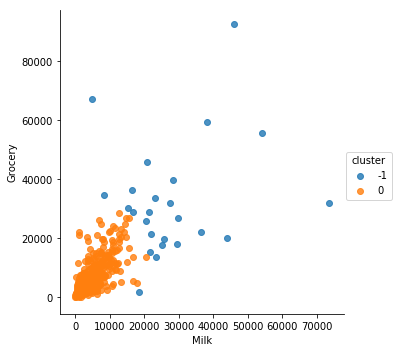

In [131]:
sns.lmplot(x='Milk',y='Grocery',data=groc,fit_reg=False,hue='cluster')